<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-projects/blob/main/Project_09_Image_Classification_Using_CIFAR-10_Dataset/Project_09_Image_Classification_Using_CIFAR_10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Ciffar10 Dataset

# Image Classification CNN | ANN CIFFAR 10

## Import Tools

In [1]:
# Import necessary libraries for the model
from __future__ import print_function
import keras
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Setting Constant

In [2]:
# Setting constants for model training
batch_size = 32
num_classes = 10
data_augmentation = True

## Load Dataset

In [3]:
# Load the CIFAR-10 dataset
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 65s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Showing Images

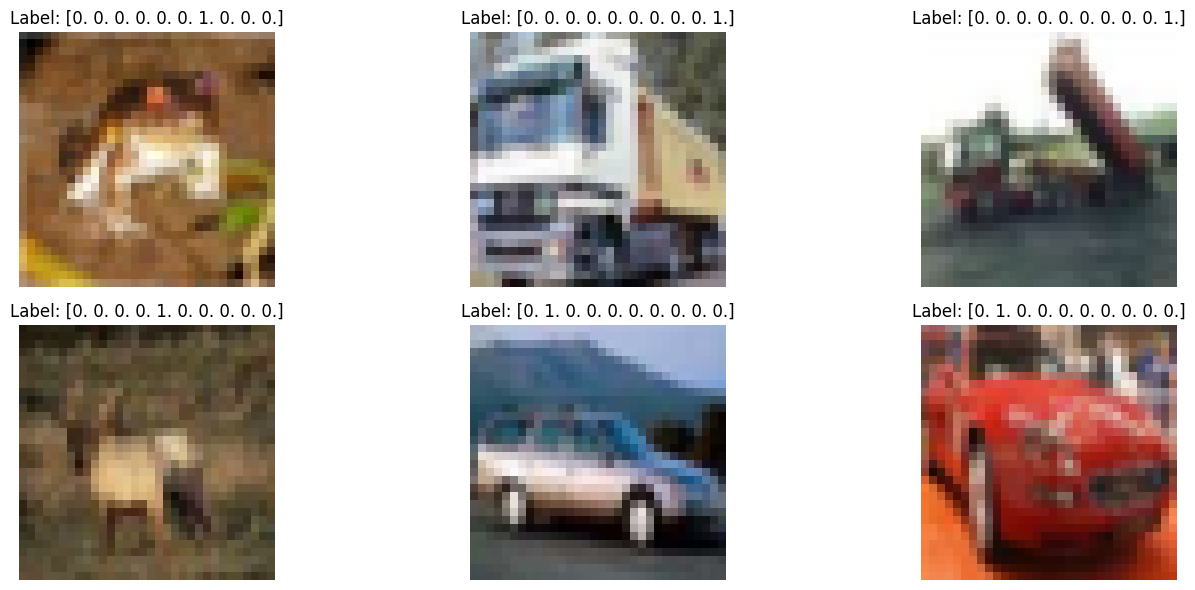

In [5]:
# Display sample images from the dataset
import matplotlib.pyplot as plt

# create a figure and axes with the specified number of rows and columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))

# Flatten the axes array to easily iterate over subplots
axes = axes.flatten()

# Loop through the first ten images in the dataset and plot them
for i in range(2 * 3):
  # Plot the image
  axes[i].imshow(x_train[i])
  axes[i].axis('off')
  # Set the title of the subplot
  axes[i].set_title(f'Label: {y_train[i]}')


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Feature Scalling

In [6]:
# Perform feature scaling by normalizing pixel values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Model Architecture

In [7]:
# Define the Convolutional Neural Network (CNN) model architecture
model = Sequential()

# Convolutional layer with 32 filters, each of size 3x3
model.add(Conv2D(32, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
# RelU activation function
model.add(Activation('relu'))
# Batch normalization layer
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(Conv2D(32, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(48, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(48, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(48, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), kernel_initializer='random_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Global max pooling layer
model.add(GlobalMaxPooling2D())

# Dropout layer with dropout rate of 0.25
model.add(Dropout(0.25))

# Fully connected layer with number of units equal to the number of classes
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 24, 24, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 22, 22, 48)     │        20,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 22, 22, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 22, 22, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 20, 20, 48)     │        20,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 20, 20, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 20, 20, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 18, 18, 64)     │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 18, 18, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 179,418 (700.85 KB)

 Trainable params: 178,554 (697.48 KB)

 Non-trainable params: 864 (3.38 KB)

## Model Compilation & Training  

In [8]:
# Compile the model with Adamax optimizer and categorical crossentropy loss
opt = keras.optimizers.Adamax(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [9]:
# Train the model with the specified batch size, epochs, and validation data
history = model.fit(x_train, y_train,
              batch_size=500,
              epochs=100,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 124ms/step - accuracy: 0.1937 - loss: 3.6641 - val_accuracy: 0.1000 - val_loss: 2.3870
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.2748 - loss: 2.1609 - val_accuracy: 0.1000 - val_loss: 2.3769
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.3166 - loss: 1.9704 - val_accuracy: 0.1111 - val_loss: 2.5688
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.3561 - loss: 1.8294 - val_accuracy: 0.1182 - val_loss: 2.6974
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.3949 - loss: 1.7259 - val_accuracy: 0.1974 - val_loss: 2.4469
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.4211 - loss: 1.6374 - val_accuracy: 0.3669 - val_loss: 1.7491
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.4569 - loss: 1.5543 - val_accuracy: 0.4106 - val_loss: 1.7263
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.4799 - loss: 1.4737

## Save the Model

In [14]:
# Save the trained model
model.save('cifar10_model.h5')

## Training and validation Loss

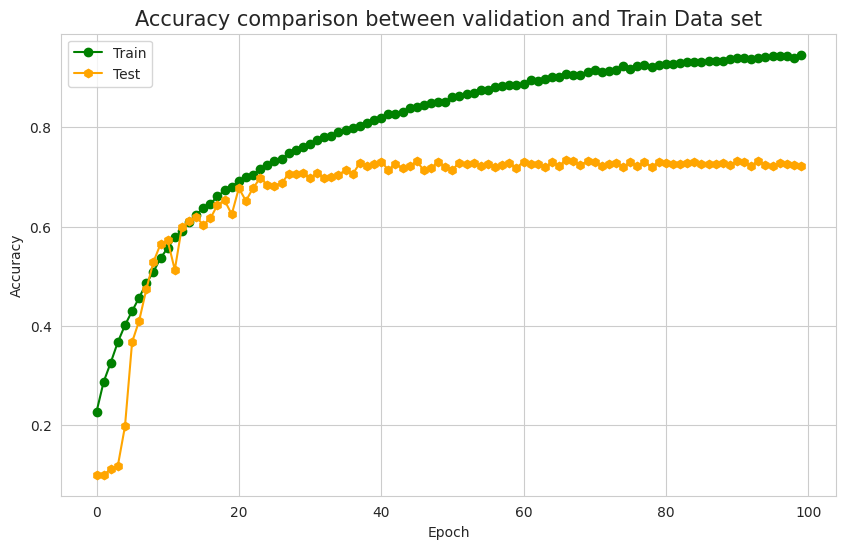

In [15]:
# Plot the training and validation accuracy over epochs
import seaborn as sb
plt.figure(figsize=(10,6))
sb.set_style('whitegrid')
plt.plot(history.history['accuracy'], color='green', marker='o')
plt.plot(history.history['val_accuracy'], color='orange', marker='h')
plt.title('Accuracy comparison between validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

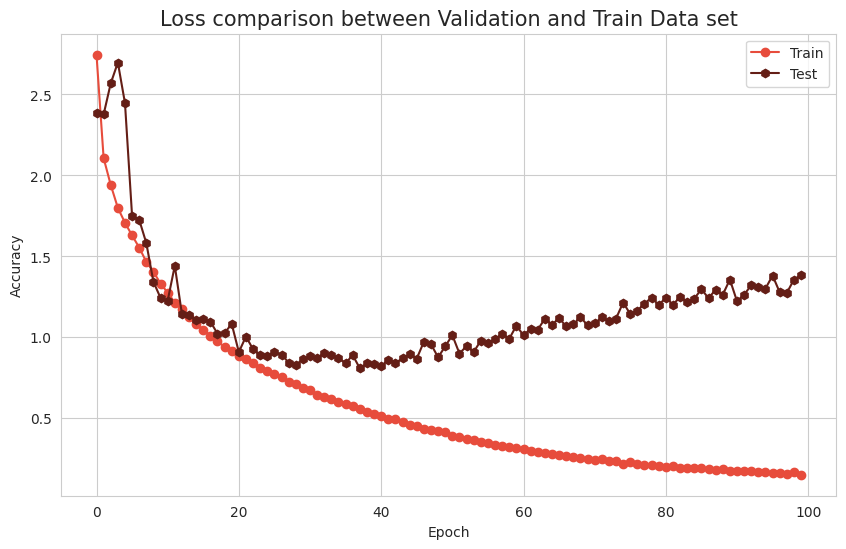

In [16]:
# Plot the training and validation loss over epochs
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(history.history['loss'],color="#E74C3C",marker='o')
plt.plot(history.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


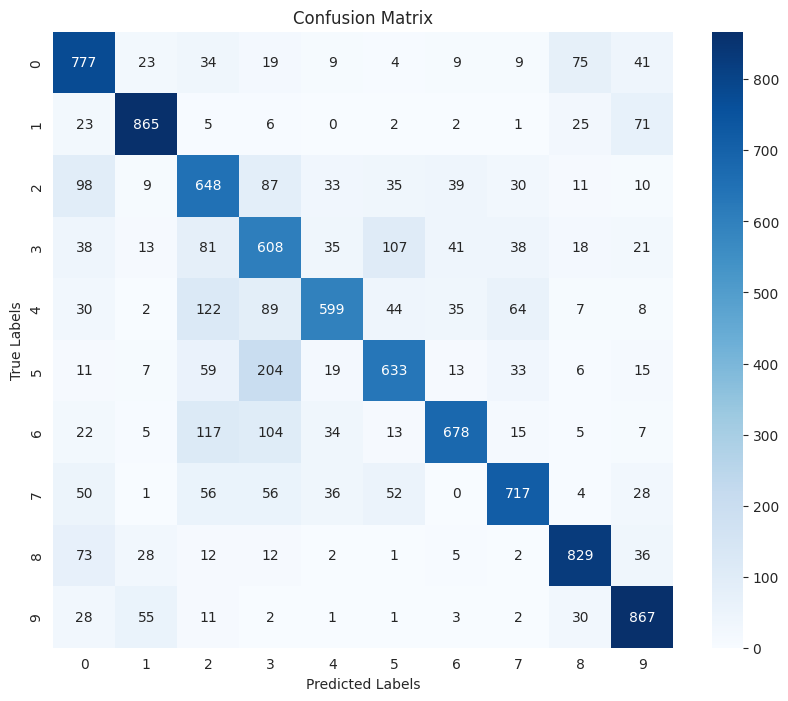

In [17]:
# Generate and plot the confusion matrix
# Prediction on the test data and store them in y_pred

y_pred = model.predict(x_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Classification Report

In [18]:
# Generate and print the classification report
# Generate the classification
from sklearn.metrics import classification_report

class_report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.78      0.72      1000
           1       0.86      0.86      0.86      1000
           2       0.57      0.65      0.60      1000
           3       0.51      0.61      0.56      1000
           4       0.78      0.60      0.68      1000
           5       0.71      0.63      0.67      1000
           6       0.82      0.68      0.74      1000
           7       0.79      0.72      0.75      1000
           8       0.82      0.83      0.82      1000
           9       0.79      0.87      0.82      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



# Predictive System

In [19]:
# Define a function to make predictions on random test images
import numpy as np
import matplotlib.pyplot as plt
import random

def predict():
  # Randomly select an index from the test set
  idx = random.randint(0, len(x_test) -1)

  # Select the image and its corresponding label
  image = x_test[idx]
  actual_label = y_test[idx]

  # Make predictions using the trained model
  prediction = model.predict(np.expand_dims(image, axis=0))
  predicted_label = np.argmax(prediction)

  # Define class name (assuming num_classes is defined)
  class_names = ['airplane','automobile','bird','cat','deer',
                 'dog','frog','horse','ship','truck']

  # Display the image
  plt.figure(figsize=(1,1))
  plt.imshow(image)
  plt.axis('off')

  # Display the actual and predicted labels
  plt.title(f"Actual: {class_names[np.argmax(actual_label)]}\nPredicted: {class_names[predicted_label]}")
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


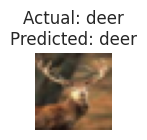

In [20]:
# Make a prediction using the defined predict function
predict()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


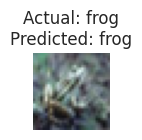

In [21]:
# Make another prediction using the defined predict function
predict()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


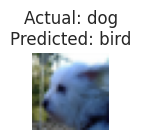

In [22]:
# Make another prediction using the defined predict function
predict()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


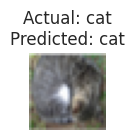

In [23]:
# Make another prediction using the defined predict function
predict()